In [2]:
#importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()


x=iris.data

y=iris.target

iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
iris_data = DataFrame(x,columns=['sepal length','sepal width','petal length','petal width'])
iris_target = DataFrame(y,columns=['species'])

In [6]:
def flower(x):
    if x == 0:
        return "setosa"
    elif x==1:
        return "versicolor"
    elif x==2:
        return "virginica"

In [7]:
iris_target['species'] = iris_target['species'].apply(flower) 

In [8]:
iris_target.tail()

,species
145,virginica
146,virginica
147,virginica
148,virginica
149,virginica


In [9]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [10]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> Since the data is already cleaned, let's visualize the data

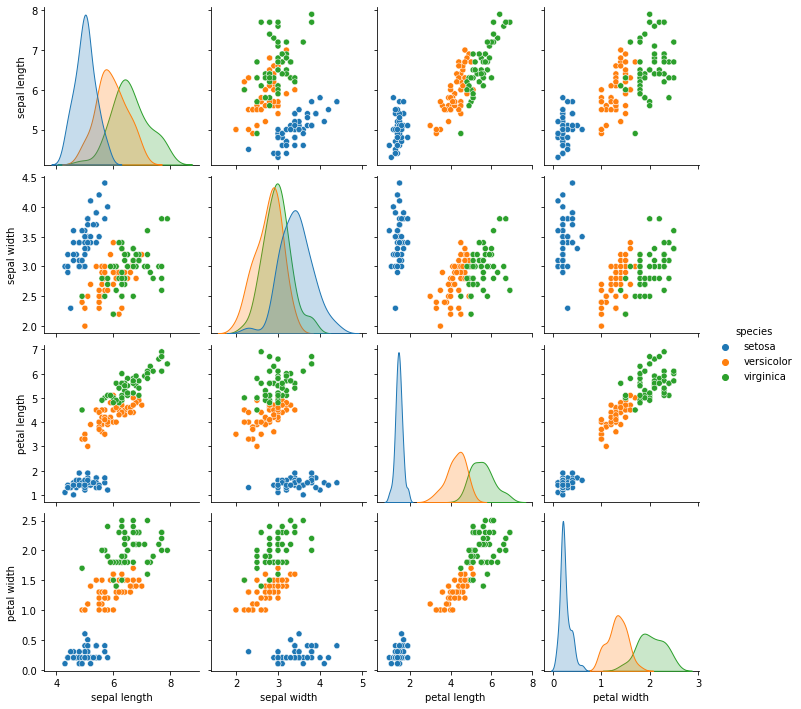

In [11]:
sns.pairplot(data=iris,hue='species')

In [12]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


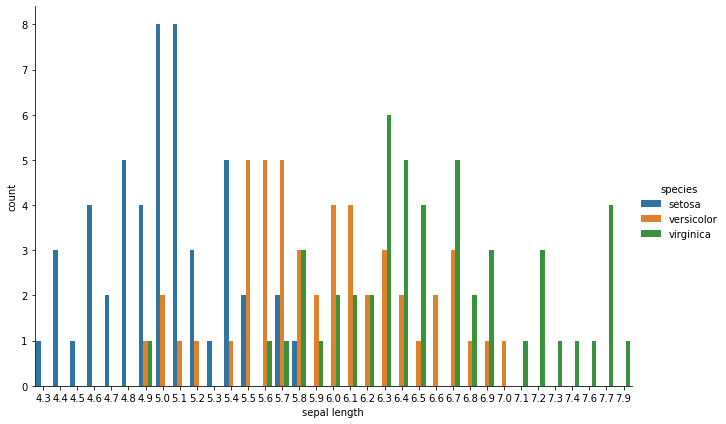

In [19]:
sns.catplot(data=iris,x='sepal length',kind='count',hue='species',height=6, aspect=1.5)

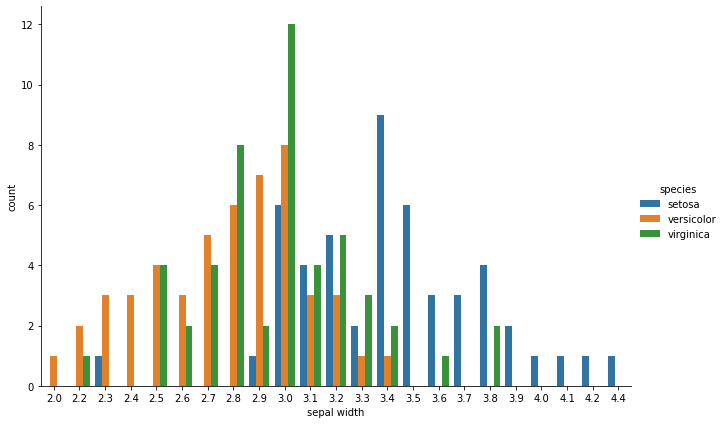

In [15]:
sns.catplot(data=iris,x='sepal width',kind='count',hue='species',height=6, aspect=1.5)

>Importing ML models

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=3)

# Train the model with the training set
logreg.fit(X_train, Y_train)

C:\Users\Srinivas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
# Prediction from X_test
Y_pred = logreg.predict(X_test)

#Check accuracy
print (metrics.accuracy_score(Y_test,Y_pred))

0.9777777777777777


Looks like our model had almost 97% accuracy. (Note: this could change from run to run due to the random splitting) Should we trust this level of accuracy? I encourage you to figure out ways to intuitively understand this result. Try looking at the PairPlot again and check to see how separate the data features initially were. Also try changing the test_size parameter and check how that effects the outcome. In conclusion, given how clean the data is and how seperated some of the features are, we should expect pretty high accuracy.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

In [21]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [22]:
Y_pred = knn.predict(X_test)

In [26]:
print(metrics.accuracy_score(Y_test,Y_pred)*100,'%')

95.55555555555556 %


Our model has 95.55% correct prediction in classifying the iris flower

In [27]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='petal length', ylabel='petal width'>

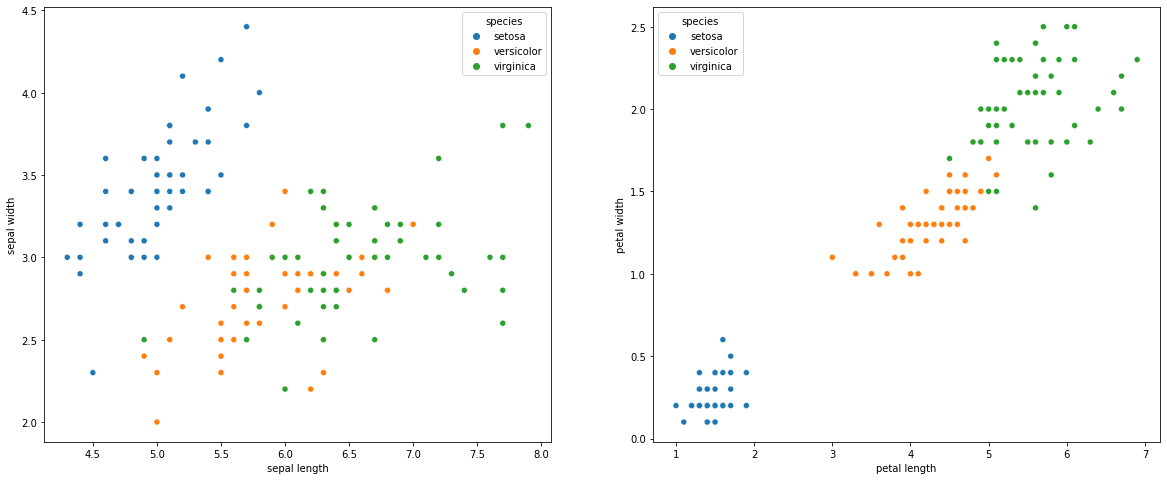

In [50]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(data=iris,x='sepal length',y='sepal width',hue='species')
plt.subplot(1,2,2)
sns.scatterplot(data=iris,x='petal length',y='petal width',hue='species')